In [50]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('salesdata.csv')

In [5]:
df.head()

,CompPrice,Income,Advertising,Population,Price,Quality,Age,Education,Urban,US,SalesCat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,141,64,3,340,128,Bad,38,13,Yes,No,No


In [6]:
X = df.drop(['SalesCat'],axis=1)
Y = df['SalesCat']

In [7]:
dt = tree.DecisionTreeClassifier(random_state=0)

In [8]:
dtmodel = dt.fit(X, Y)

ValueError: could not convert string to float: 'Bad'

In [13]:
X = pd.get_dummies(X, columns = ['Quality','Urban','US'])

In [14]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Quality_Bad,Quality_Good,Quality_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [16]:
dtmodel = dt.fit(X_train, y_train)

In [17]:
train_pred = dtmodel.predict(X_train)

In [18]:
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [19]:
test_pred = dtmodel.predict(X_test)

In [20]:
acc = accuracy_score(test_pred, y_test)
acc*100

76.66666666666667

In [21]:
# We observe overfitting above. Lets see the tree if it is complex or not.

In [22]:
text_representation = tree.export_text(dtmodel)
print(text_representation)

|--- feature_4 <= 92.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_3 <= 207.50
|   |   |   |--- feature_4 <= 86.50
|   |   |   |   |--- class: Yes
|   |   |   |--- feature_4 >  86.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- class: Yes
|   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |--- feature_2 <= 5.00
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- feature_2 >  5.00
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |--- class: Yes
|   |   |--- feature_3 >  207.50
|   |   |   |--- class: Yes
|   |--- feature_7 >  0.50
|   |   |--- feature_1 <= 85.00
|   |   |   |--- feature_3 <= 268.50
|   |   |   |   |--- class: No
|   |   |   |--- feature_3 >  268.50
|   |   |   |   |--- feature_1 <= 42.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_1 >  42.50
|   |   |   |   |   |--- class: Yes
|   |   |--- f

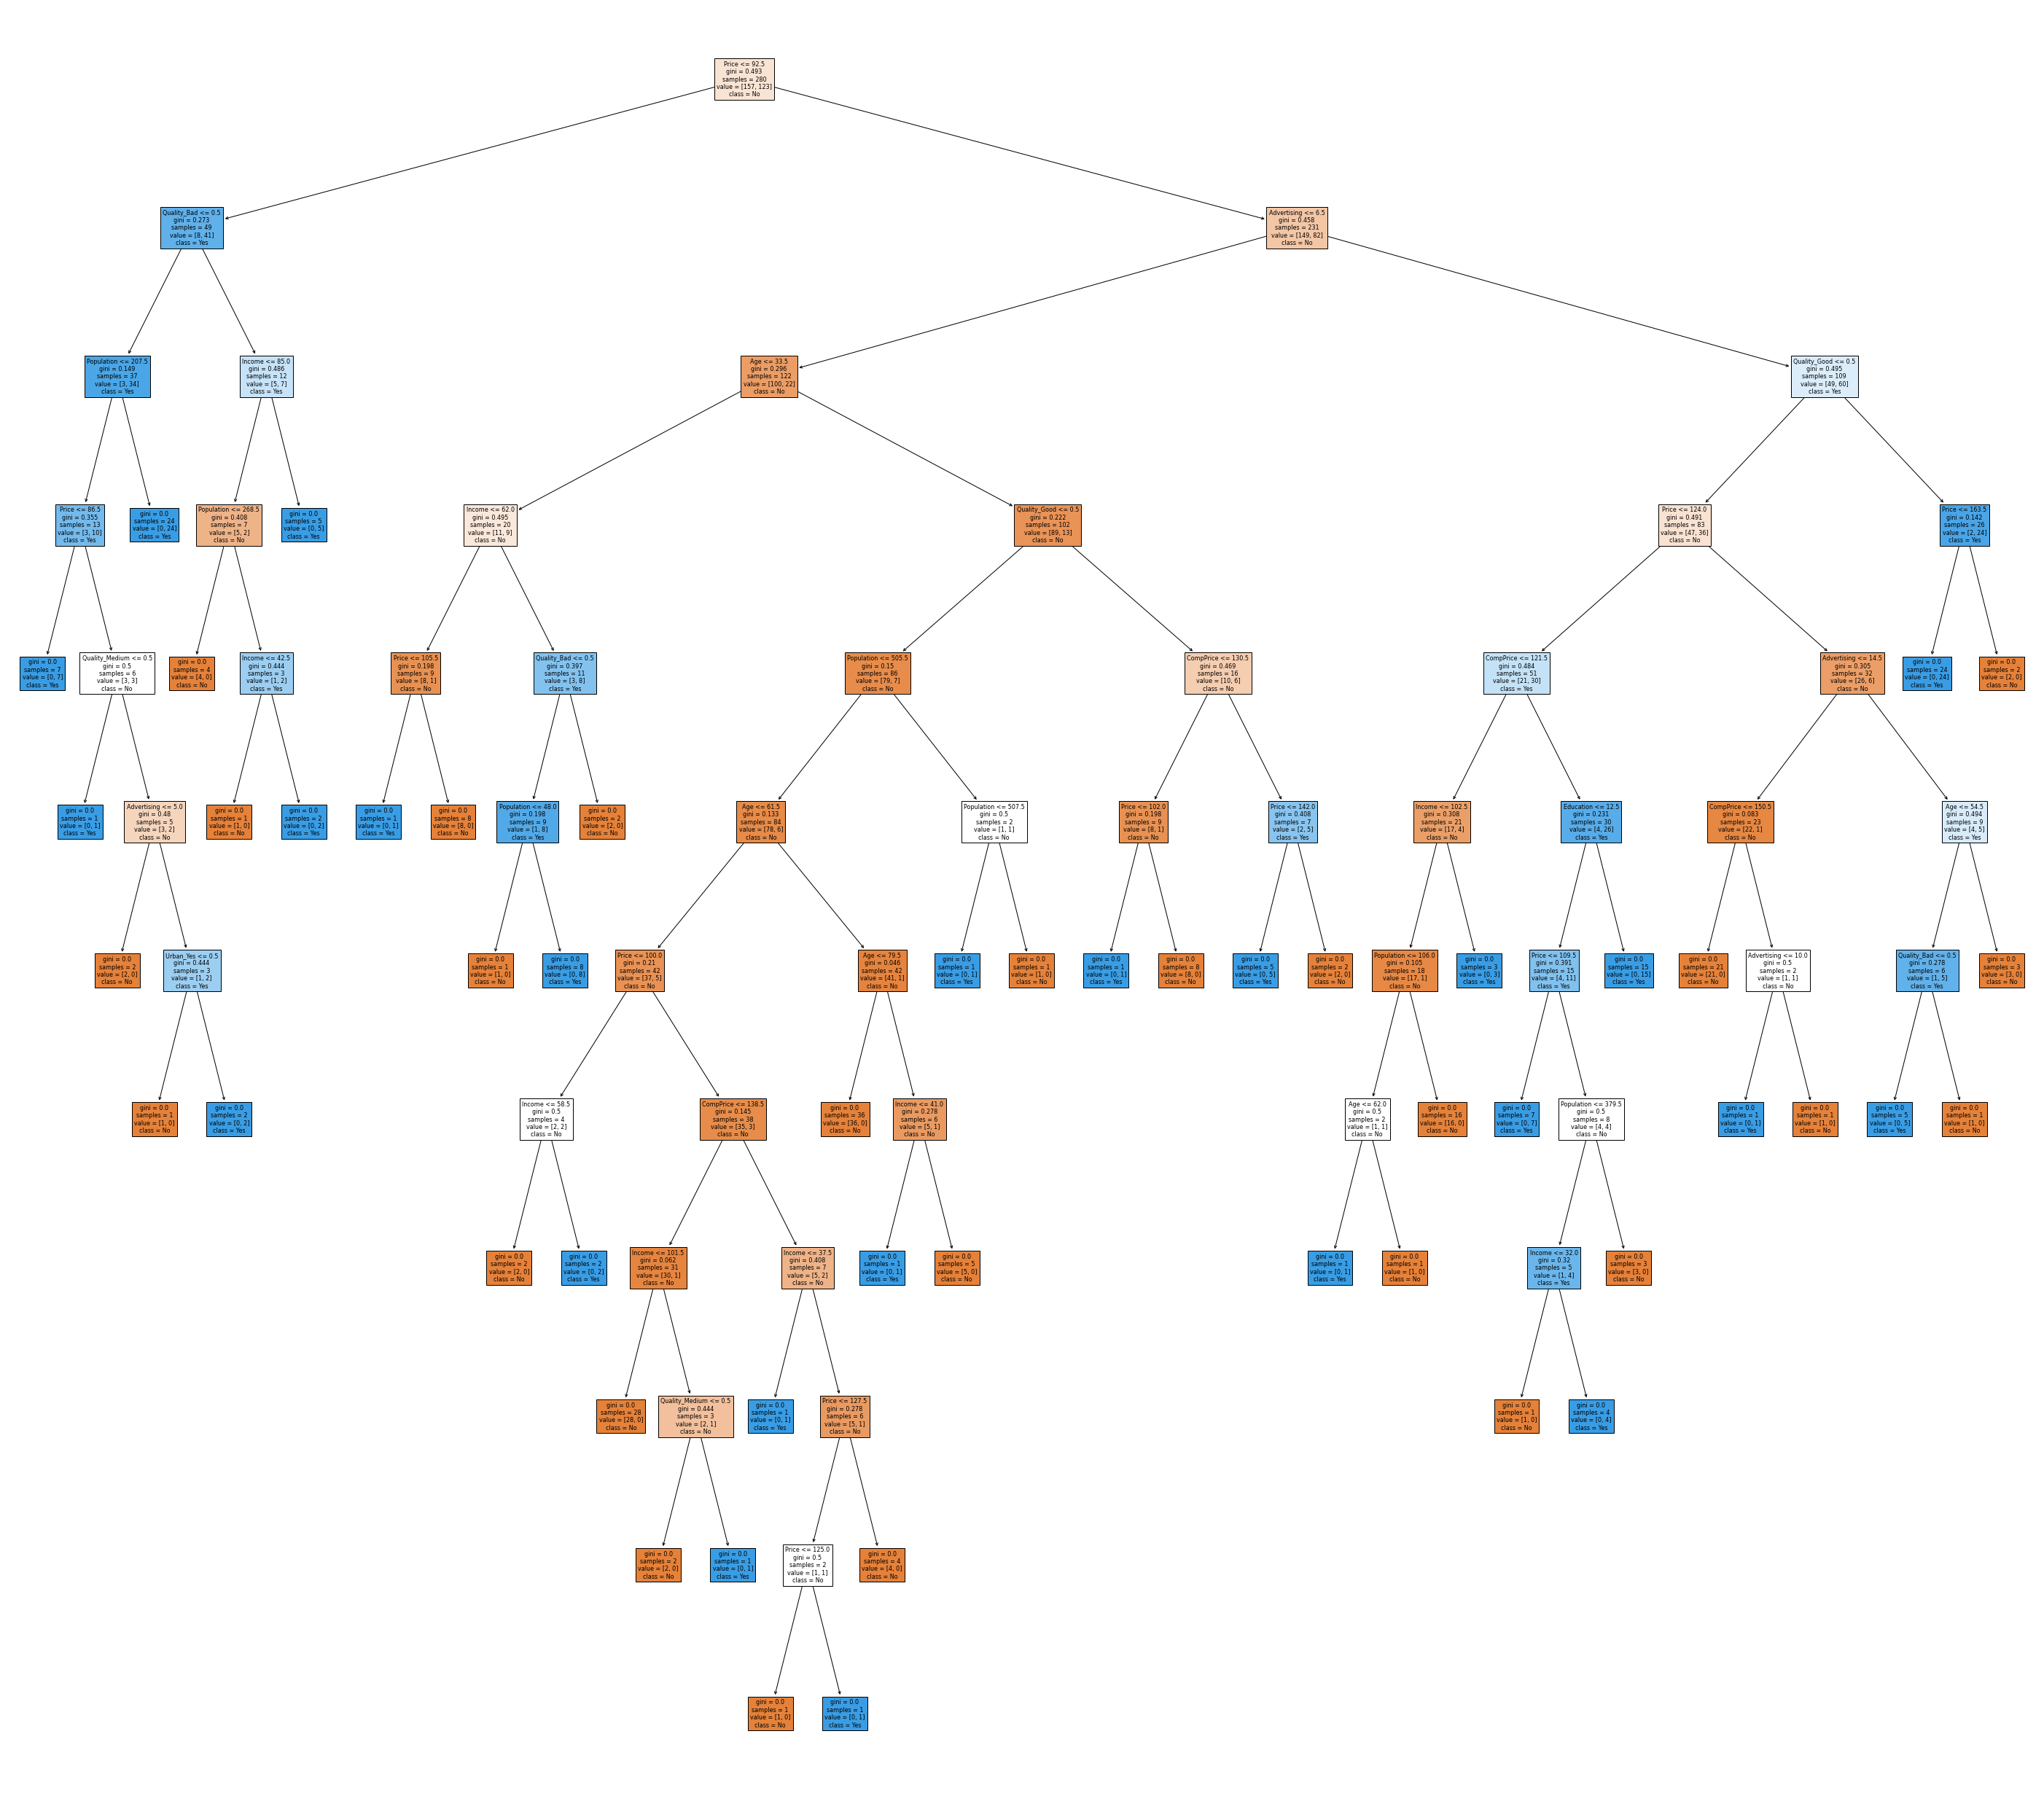

In [23]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

In [24]:
dt = tree.DecisionTreeClassifier(criterion='gini',random_state=99)

In [25]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [26]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

80.83333333333333

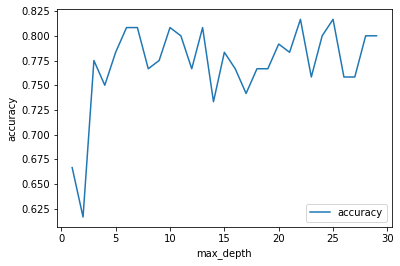

In [27]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [28]:
# Pruned Model

In [29]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=6)

In [30]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

95.35714285714286

In [31]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

81.66666666666667

In [32]:
# Pruning helped increasing the accuracy on test data

### Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators=100)

In [34]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [35]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.66666666666667

In [36]:
## Better than Decision Trees

In [37]:
rfmodel.feature_importances_

array([0.09721539, 0.10055548, 0.12600159, 0.08388342, 0.22291171,
       0.11946559, 0.05940331, 0.04650153, 0.06477071, 0.02677268,
       0.01111049, 0.00896845, 0.01665797, 0.01578168])

<BarContainer object of 14 artists>

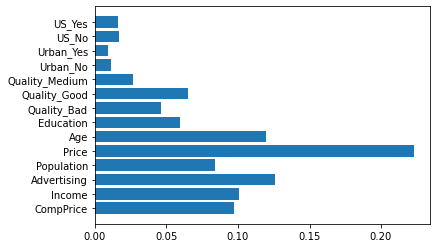

In [38]:
plt.barh(list(X.columns), rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

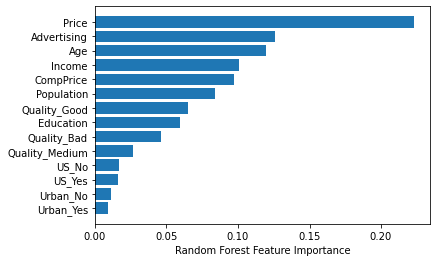

In [39]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [40]:
## Cross Validation

In [42]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores

array([0.85  , 0.7375, 0.8375, 0.725 , 0.875 ])

In [44]:
scores.mean()

0.805

In [52]:
cm = confusion_matrix(y_train,train_pred)
cm

array([[157,   0],
       [  0, 123]], dtype=int64)

In [53]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[69, 10],
       [ 6, 35]], dtype=int64)

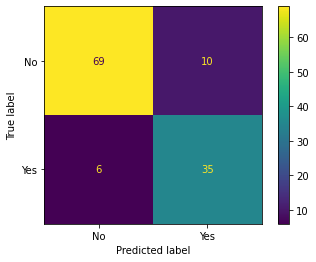

In [59]:
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()

### Whisky Data

In [178]:
wdata = pd.read_csv('whiskeydataset.csv')

In [179]:
wdata.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
2,Balblair,2,3,2,1,0,0,2,0,2,1,2,1
3,Balmenach,4,3,2,0,0,2,1,3,3,0,1,2
4,Dufftown,2,3,1,1,0,0,0,0,1,2,2,2


In [180]:
WX = wdata.drop(['Distillery'],axis=1)
WY = wdata['Distillery']

In [204]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=99)

In [205]:
dtmodel2 = dt2.fit(WX, WY)

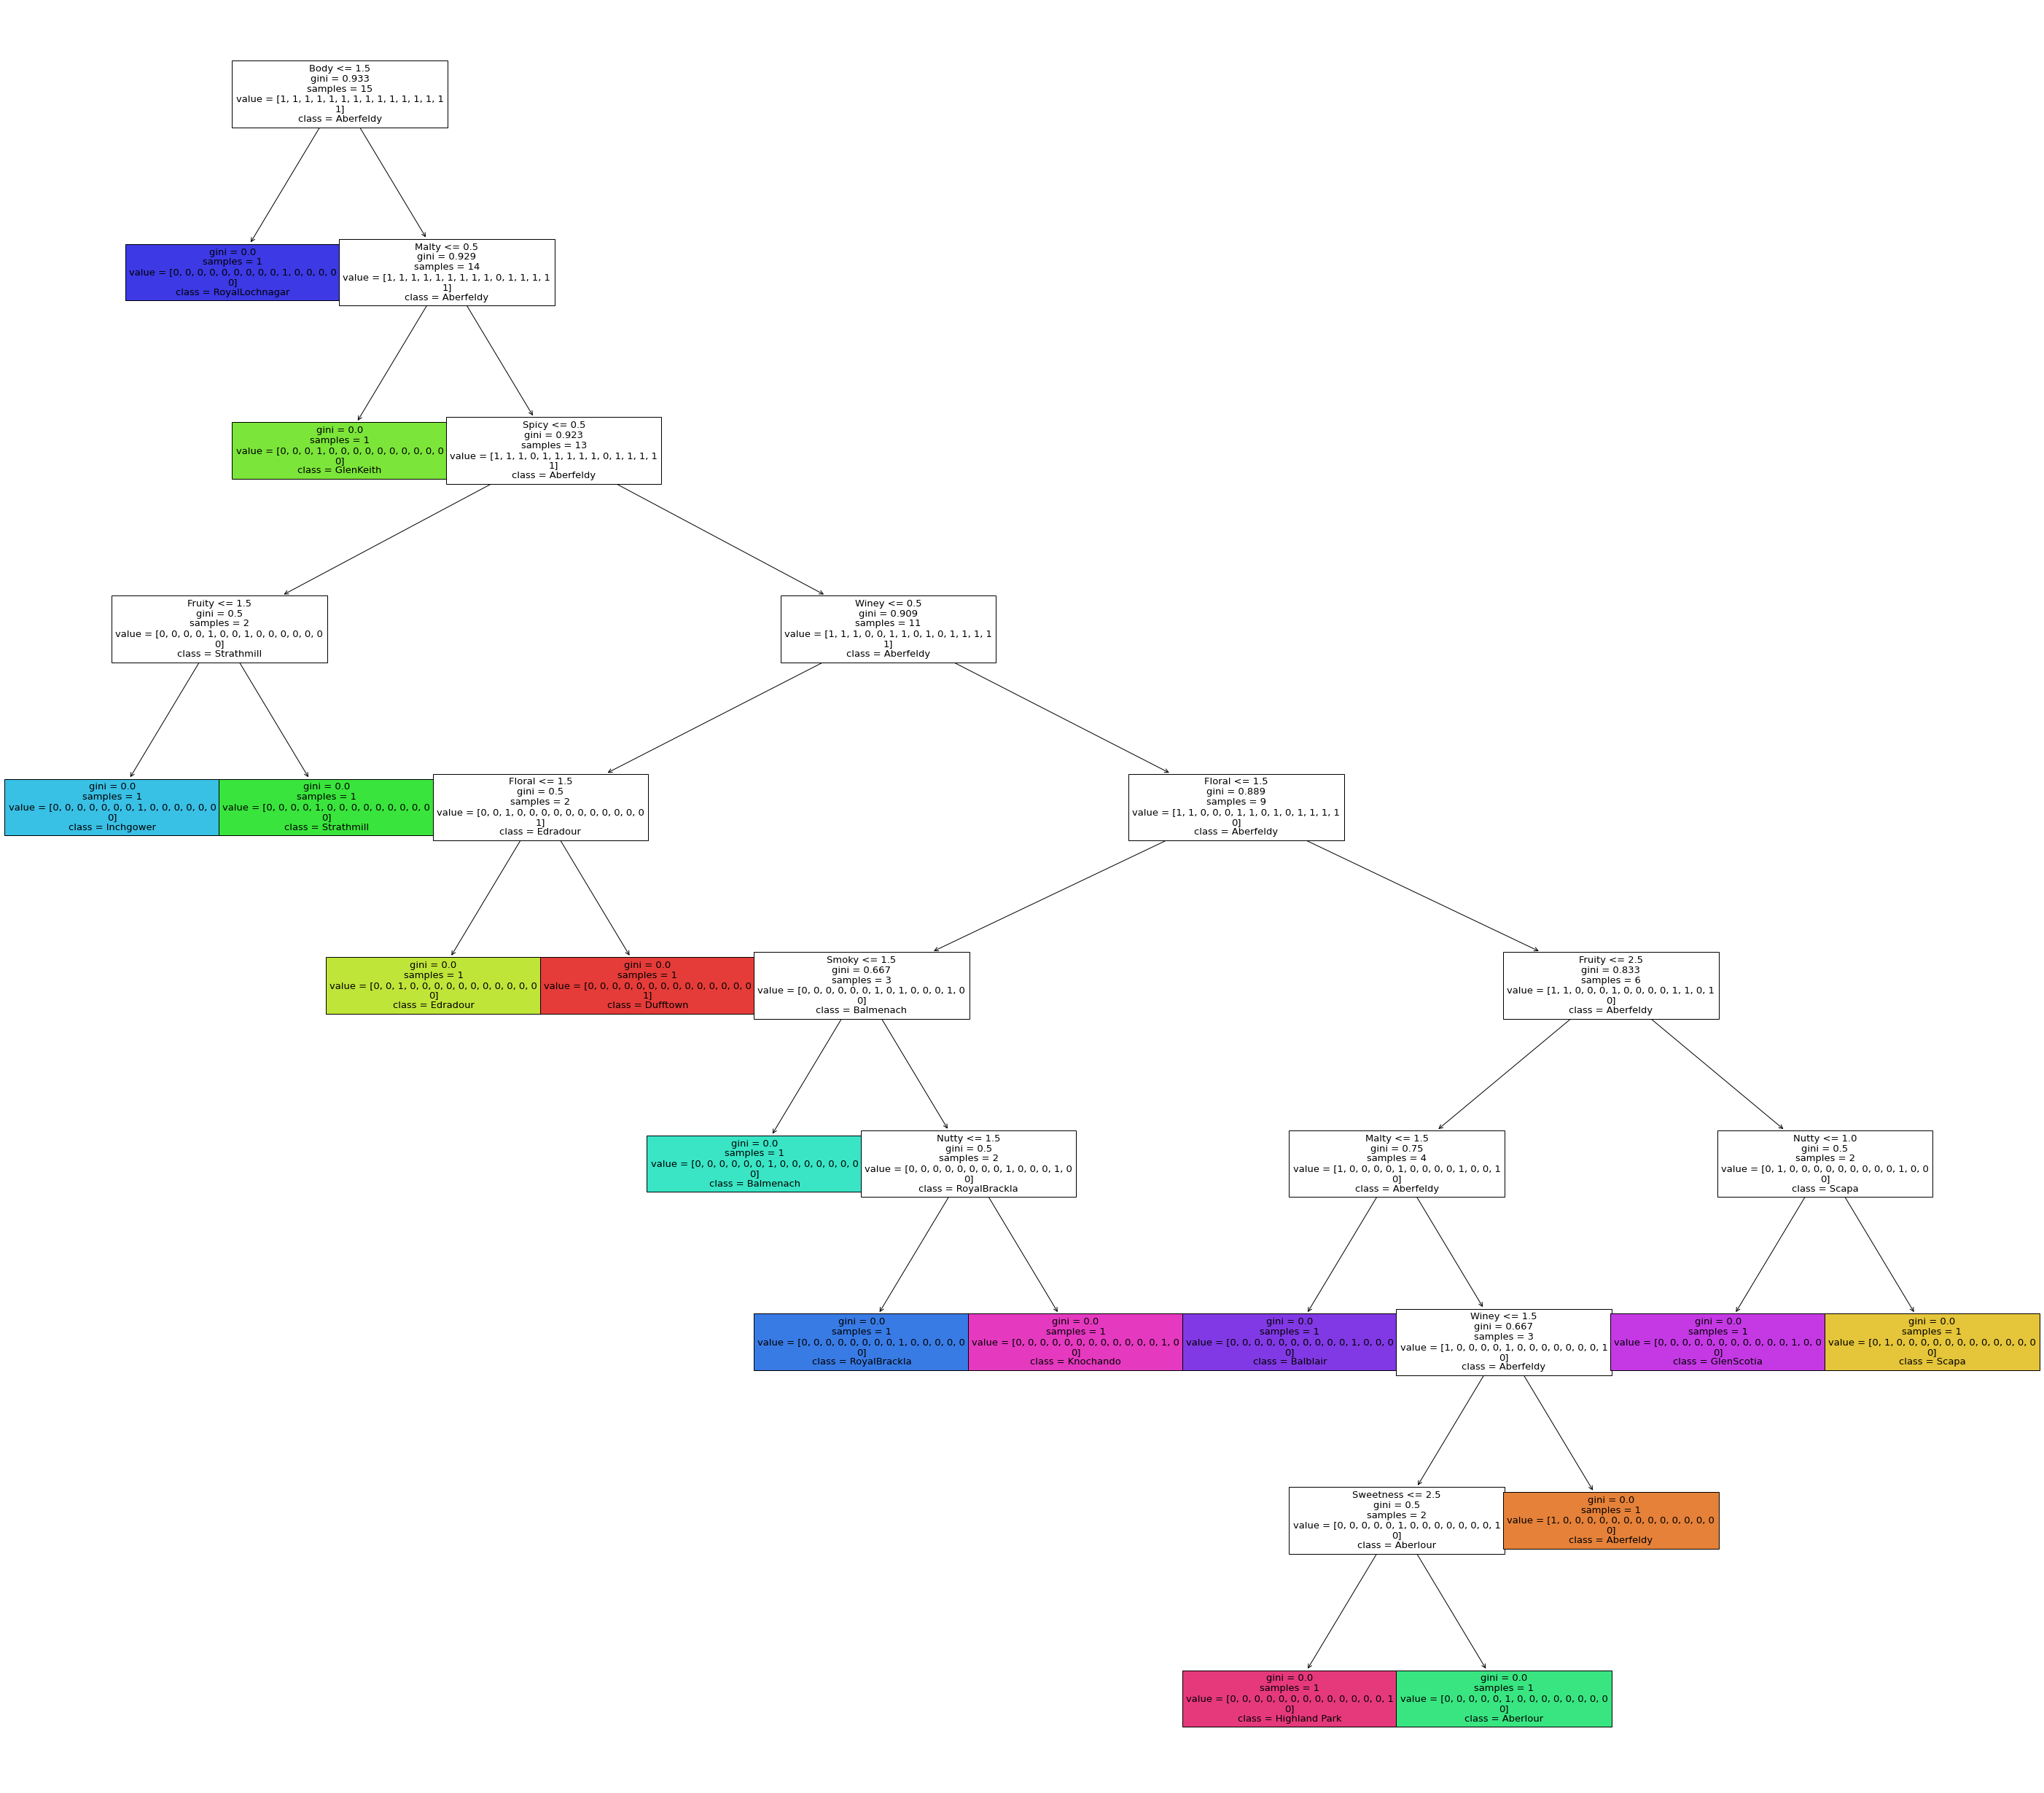

In [206]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(WX.columns),  
                   class_names=WY.value_counts().index,
                   filled=True)

In [60]:
fig.savefig("decistion_tree.png")